In [1]:
import numpy as np
import os
import mne
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
from sklearn import linear_model
# for RSA toolbox
import rsatoolbox


dirname = os.getcwd()

In [2]:
EEG_list_action_sorted = ['outdoor_manmade_0147',  'outdoor_manmade_0148',  'outdoor_natural_0246',
 'outdoor_natural_0062',   'outdoor_natural_0160',   'outdoor_natural_0255',
 'outdoor_natural_0128',   'indoor_0156',   'outdoor_manmade_0173',
 'outdoor_manmade_0089',   'outdoor_natural_0104', 'outdoor_natural_0273',
 'outdoor_natural_0079',  'outdoor_manmade_0175',  'outdoor_natural_0042',
 'outdoor_natural_0198',  'outdoor_manmade_0131',  'outdoor_natural_0091',
 'outdoor_manmade_0152',  'outdoor_natural_0200',  'outdoor_manmade_0157',
 'outdoor_manmade_0155',  'indoor_0282',  'outdoor_manmade_0256',
 'outdoor_manmade_0257',  'outdoor_natural_0011',  'indoor_0066',
 'outdoor_manmade_0119',  'outdoor_manmade_0220',  'outdoor_manmade_0068',
 'outdoor_manmade_0133',  'outdoor_manmade_0258',  'outdoor_manmade_0040',
 'outdoor_natural_0132',  'outdoor_manmade_0064',  'outdoor_manmade_0032',
 'outdoor_manmade_0063',  'outdoor_manmade_0015',  'outdoor_manmade_0110',
 'outdoor_manmade_0167',  'outdoor_manmade_0117',  'outdoor_manmade_0030',
 'outdoor_natural_0207',  'outdoor_natural_0053',  'outdoor_natural_0261',
 'outdoor_natural_0097',  'outdoor_natural_0004',  'outdoor_manmade_0149',
 'outdoor_natural_0034',  'outdoor_manmade_0161',  'indoor_0033',
 'indoor_0163',  'indoor_0235',  'indoor_0100',
 'indoor_0058',  'indoor_0145',  'indoor_0271',
 'indoor_0266',  'indoor_0130',  'outdoor_manmade_0276',
 'indoor_0025',  'indoor_0021',  'outdoor_manmade_0165',
 'indoor_0283',  'indoor_0136',  'indoor_0249',
 'indoor_0279',  'indoor_0215',  'indoor_0221',
 'indoor_0216',  'indoor_0214',  'indoor_0080',
 'indoor_0103',  'indoor_0146',  'indoor_0055',
 'indoor_0212',  'indoor_0281',  'outdoor_manmade_0154',
 'indoor_0270',  'outdoor_natural_0049',  'outdoor_natural_0009',
 'outdoor_natural_0010',  'indoor_0272',  'outdoor_natural_0008',
 'outdoor_natural_0052',  'outdoor_natural_0023',  'outdoor_natural_0250',
 'outdoor_natural_0050',  'outdoor_natural_0017',  'outdoor_natural_0252']

fMRI_stim_ordering = ['indoor_0021', 'indoor_0025', 'indoor_0033', 'indoor_0055',
       'indoor_0058', 'indoor_0066', 'indoor_0080', 'indoor_0100',
       'indoor_0103', 'indoor_0130', 'indoor_0136', 'indoor_0145',
       'indoor_0146', 'indoor_0156', 'indoor_0163', 'indoor_0212',
       'indoor_0214', 'indoor_0215', 'indoor_0216', 'indoor_0221',
       'indoor_0235', 'indoor_0249', 'indoor_0266', 'indoor_0270',
       'indoor_0271', 'indoor_0272', 'indoor_0279', 'indoor_0281',
       'indoor_0282', 'indoor_0283', 'outdoor_manmade_0015',
       'outdoor_manmade_0030', 'outdoor_manmade_0032', 'outdoor_manmade_0040',
       'outdoor_manmade_0063', 'outdoor_manmade_0064', 'outdoor_manmade_0068',
       'outdoor_manmade_0089', 'outdoor_manmade_0110', 'outdoor_manmade_0117',
       'outdoor_manmade_0119', 'outdoor_manmade_0131', 'outdoor_manmade_0133',
       'outdoor_manmade_0147', 'outdoor_manmade_0148', 'outdoor_manmade_0149',
       'outdoor_manmade_0152', 'outdoor_manmade_0154', 'outdoor_manmade_0155',
       'outdoor_manmade_0157', 'outdoor_manmade_0161', 'outdoor_manmade_0165',
       'outdoor_manmade_0167', 'outdoor_manmade_0173', 'outdoor_manmade_0175',
       'outdoor_manmade_0220', 'outdoor_manmade_0256', 'outdoor_manmade_0257',
       'outdoor_manmade_0258', 'outdoor_manmade_0276', 'outdoor_natural_0004',
       'outdoor_natural_0008', 'outdoor_natural_0009', 'outdoor_natural_0010',
       'outdoor_natural_0011', 'outdoor_natural_0017', 'outdoor_natural_0023',
       'outdoor_natural_0034', 'outdoor_natural_0042', 'outdoor_natural_0049',
       'outdoor_natural_0050', 'outdoor_natural_0052', 'outdoor_natural_0053',
       'outdoor_natural_0062', 'outdoor_natural_0079', 'outdoor_natural_0091',
       'outdoor_natural_0097', 'outdoor_natural_0104', 'outdoor_natural_0128',
       'outdoor_natural_0132', 'outdoor_natural_0160', 'outdoor_natural_0198',
       'outdoor_natural_0200', 'outdoor_natural_0207', 'outdoor_natural_0246',
       'outdoor_natural_0250', 'outdoor_natural_0252', 'outdoor_natural_0255',
       'outdoor_natural_0261', 'outdoor_natural_0273']

# remove "_" from each string in the list
fmri_ordering = [x.replace("_", "") for x in fMRI_stim_ordering]

# remove "_" from each string in the list
images_name = [x.replace("_", "") for x in EEG_list_action_sorted]

In [3]:
#event dictionary
event_dict = { 'indoor0156' : 4033, 'indoor0282' : 3852, 'indoor0270' : 4064, 'indoor0272' : 4007, 'indoor0066' : 4023, 'indoor0283' : 3898, 'indoor0214' : 3953, 'indoor0080' : 4055, 'indoor0215' : 3964, 'indoor0216': 3931, 'indoor0146' : 4074, 'indoor0221' : 4045, 'indoor0235': 4071, 'indoor0212' : 3960, 'indoor0058' : 4047, 'indoor0145' : 3989, 'indoor0136' : 4018, 'indoor0130' : 4088, 'indoor0163' : 3894, 'indoor0103': 4017,'indoor0100' : 3842, 'indoor0055' : 3858, 'indoor0021' : 3888, 'indoor0266': 3853, 'indoor0025' : 4062, 'indoor0279' : 4027, 'indoor0281' : 3873, 'indoor0271' : 4014, 'indoor0249' : 4002, 'indoor0033' : 4085, 'outdoornatural0010' : 4020, 'outdoornatural0009' : 3981, 'outdoornatural0049' : 3942, 'outdoornatural0008' : 3903, 'outdoornatural0052' : 4076, 'outdoornatural0050' : 4072, 'outdoornatural0132' : 3914, 'outdoornatural0053' : 3930, 'outdoornatural0004' : 3984, 'outdoornatural0207' : 3997, 'outdoornatural0097' : 4003, 'outdoornatural0261' : 4056, 'outdoornatural0011' : 4075, 'outdoornatural0198' : 4063, 'outdoornatural0128' : 3971, 'outdoornatural0255' : 3955, 'outdoornatural0062' : 3925, 'outdoornatural0246' : 3994, 'outdoornatural0160' : 3940, 'outdoornatural0091' : 4030, 'outdoornatural0104' : 4000, 'outdoornatural0200' : 3902, 'outdoornatural0273' : 4043, 'outdoornatural0079' : 3944, 'outdoornatural0042' : 3986, 'outdoornatural0034' : 4061, 'outdoornatural0017' : 3950, 'outdoornatural0023' : 3859, 'outdoornatural0252' : 3870, 'outdoornatural0250' : 3884, 'outdoormanmade0167' : 4059, 'outdoormanmade0040' : 3851, 'outdoormanmade0110' : 3841, 'outdoormanmade0117' : 4077, 'outdoormanmade0030': 3891, 'outdoormanmade0258' : 4081, 'outdoormanmade0064' : 3926, 'outdoormanmade0068' : 4038, 'outdoormanmade0063' : 3845, 'outdoormanmade0015' : 3871, 'outdoormanmade0257': 4078, 'outdoormanmade0032' : 3878, 'outdoormanmade0256': 3918, 'outdoormanmade0220' : 4052, 'outdoormanmade0133' : 4013, 'outdoormanmade0119' : 3886, 'outdoormanmade0152' : 4001, 'outdoormanmade0148' : 4083, 'outdoormanmade0155' : 3899, 'outdoormanmade0157' : 3843, 'outdoormanmade0175' : 4048, 'outdoormanmade0173': 3907, 'outdoormanmade0089' : 3862, 'outdoormanmade0147': 4060, 'outdoormanmade0131' : 3874, 'outdoormanmade0161' : 3869, 'outdoormanmade0154' : 4041, 'outdoormanmade0165' : 3854, 'outdoormanmade0276': 3976, 'outdoormanmade0149' : 3866}
#images_name = [ 'indoor0156' , 'indoor0282', 'indoor0270' , 'indoor0272', 'indoor0066', 'indoor0283', 'indoor0214', 'indoor0080' , 'indoor0215', 'indoor0216' , 'indoor0146', 'indoor0221' , 'indoor0235', 'indoor0212' , 'indoor0058' , 'indoor0145', 'indoor0136', 'indoor0130' , 'indoor0163', 'indoor0103','indoor0100' , 'indoor0055', 'indoor0021', 'indoor0266', 'indoor0025', 'indoor0279' , 'indoor0281', 'indoor0271', 'indoor0249' , 'indoor0033', 'outdoornatural0010', 'outdoornatural0009', 'outdoornatural0049' , 'outdoornatural0008' , 'outdoornatural0052' , 'outdoornatural0050' , 'outdoornatural0132' , 'outdoornatural0053' , 'outdoornatural0004' , 'outdoornatural0207', 'outdoornatural0097', 'outdoornatural0261', 'outdoornatural0011' , 'outdoornatural0198' , 'outdoornatural0128' , 'outdoornatural0255', 'outdoornatural0062' , 'outdoornatural0246' , 'outdoornatural0160', 'outdoornatural0091' , 'outdoornatural0104' , 'outdoornatural0200' , 'outdoornatural0273' , 'outdoornatural0079', 'outdoornatural0042' , 'outdoornatural0034' , 'outdoornatural0017', 'outdoornatural0023' , 'outdoornatural0252', 'outdoornatural0250' , 'outdoormanmade0167' , 'outdoormanmade0040' , 'outdoormanmade0110' , 'outdoormanmade0117' , 'outdoormanmade0030', 'outdoormanmade0258' , 'outdoormanmade0064' , 'outdoormanmade0068' , 'outdoormanmade0063', 'outdoormanmade0015' , 'outdoormanmade0257', 'outdoormanmade0032' , 'outdoormanmade0256' , 'outdoormanmade0220'  , 'outdoormanmade0133' , 'outdoormanmade0119' , 'outdoormanmade0152' , 'outdoormanmade0148' , 'outdoormanmade0155', 'outdoormanmade0157', 'outdoormanmade0175' , 'outdoormanmade0173', 'outdoormanmade0089' , 'outdoormanmade0147', 'outdoormanmade0131', 'outdoormanmade0161', 'outdoormanmade0154' , 'outdoormanmade0165' , 'outdoormanmade0276', 'outdoormanmade0149' ]
#event_dict = { 'indoor_0156' : 4033, 'indoor_0282' : 3852, 'indoor_0270' : 4064, 'indoor_0272' : 4007, 'indoor_0066' : 4023, 'indoor_0283' : 3898, 'indoor_0214' : 3953, 'indoor_0080' : 4055, 'indoor_0215' : 3964, 'indoor_0216': 3931, 'indoor_0146' : 4074, 'indoor_0221' : 4045, 'indoor_0235': 4071, 'indoor_0212' : 3960, 'indoor_0058' : 4047, 'indoor_0145' : 3989, 'indoor_0136' : 4018, 'indoor_0130' : 4088, 'indoor_0163' : 3894, 'indoor_0103': 4017,'indoor_0100' : 3842, 'indoor_0055' : 3858, 'indoor_0021' : 3888, 'indoor_0266': 3853, 'indoor_0025' : 4062, 'indoor_0279' : 4027, 'indoor_0281' : 3873, 'indoor_0271' : 4014, 'indoor_0249' : 4002, 'indoor_0033' : 4085, 'outdoor_natural_0010' : 4020, 'outdoor_natural_0009' : 3981, 'outdoor_natural_0049' : 3942, 'outdoor_natural_0008' : 3903, 'outdoor_natural_0052' : 4076, 'outdoor_natural_0050' : 4072, 'outdoor_natural_0132' : 3914, 'outdoor_natural_0053' : 3930, 'outdoor_natural_0004' : 3984, 'outdoor_natural_0207' : 3997, 'outdoor_natural_0097' : 4003, 'outdoor_natural_0261' : 4056, 'outdoor_natural_0011' : 4075, 'outdoor_natural_0198' : 4063, 'outdoor_natural_0128' : 3971, 'outdoor_natural_0255' : 3955, 'outdoor_natural_0062' : 3925, 'outdoor_natural_0246' : 3994, 'outdoor_natural_0160' : 3940, 'outdoor_natural_0091' : 4030, 'outdoor_natural_0104' : 4000, 'outdoor_natural_0200' : 3902, 'outdoor_natural_0273' : 4043, 'outdoor_natural_0079' : 3944, 'outdoor_natural_0042' : 3986, 'outdoor_natural_0034' : 4061, 'outdoor_natural_0017' : 3950, 'outdoor_natural_0023' : 3859, 'outdoor_natural_0252' : 3870, 'outdoor_natural_0250' : 3884, 'outdoor_manmade_0167' : 4059, 'outdoor_manmade_0040' : 3851, 'outdoor_manmade_0110' : 3841, 'outdoor_manmade_0117' : 4077, 'outdoor_manmade_0030': 3891, 'outdoor_manmade_0258' : 4081, 'outdoor_manmade_0064' : 3926, 'outdoor_manmade_0068' : 4038, 'outdoor_manmade_0063' : 3845, 'outdoor_manmade_0015' : 3871, 'outdoor_manmade_0257': 4078, 'outdoor_manmade_0032' : 3878, 'outdoor_manmade_0256': 3918, 'outdoor_manmade_0220' : 4052, 'outdoor_manmade_0133' : 4013, 'outdoor_manmade_0119' : 3886, 'outdoor_manmade_0152' : 4001, 'outdoor_manmade_0148' : 4083, 'outdoor_manmade_0155' : 3899, 'outdoor_manmade_0157' : 3843, 'outdoor_manmade_0175' : 4048, 'outdoor_manmade_0173': 3907, 'outdoor_manmade_0089' : 3862, 'outdoor_manmade_0147': 4060, 'outdoor_manmade_0131' : 3874, 'outdoor_manmade_0161' : 3869, 'outdoor_manmade_0154' : 4041, 'outdoor_manmade_0165' : 3854, 'outdoor_manmade_0276': 3976, 'outdoor_manmade_0149' : 3866}


event_dict = { 'indoor0156' : 4033, 'indoor0282' : 3852, 'indoor0270' : 4064, 'indoor0272' : 4007, 'indoor0066' : 4023, 'indoor0283' : 3898, 'indoor0214' : 3953, 'indoor0080' : 4055, 'indoor0215' : 3964, 'indoor0216': 3931, 'indoor0146' : 4074, 'indoor0221' : 4045, 'indoor0235': 4071, 'indoor0212' : 3960, 'indoor0058' : 4047, 'indoor0145' : 3989, 'indoor0136' : 4018, 'indoor0130' : 4088, 'indoor0163' : 3894, 'indoor0103': 4017,'indoor0100' : 3842, 'indoor0055' : 3858, 'indoor0021' : 3888, 'indoor0266': 3853, 'indoor0025' : 4062, 'indoor0279' : 4027, 'indoor0281' : 3873, 'indoor0271' : 4014, 'indoor0249' : 4002, 'indoor0033' : 4085, 'outdoornatural0010' : 4020, 'outdoornatural0009' : 3981, 'outdoornatural0049' : 3942, 'outdoornatural0008' : 3903, 'outdoornatural0052' : 4076, 'outdoornatural0050' : 4072, 'outdoornatural0132' : 3914, 'outdoornatural0053' : 3930, 'outdoornatural0004' : 3984, 'outdoornatural0207' : 3997, 'outdoornatural0097' : 4003, 'outdoornatural0261' : 4056, 'outdoornatural0011' : 4075, 'outdoornatural0198' : 4063, 'outdoornatural0128' : 3971, 'outdoornatural0255' : 3955, 'outdoornatural0062' : 3925, 'outdoornatural0246' : 3994, 'outdoornatural0160' : 3940, 'outdoornatural0091' : 4030, 'outdoornatural0104' : 4000, 'outdoornatural0200' : 3902, 'outdoornatural0273' : 4043, 'outdoornatural0079' : 3944, 'outdoornatural0042' : 3986, 'outdoornatural0034' : 4061, 'outdoornatural0017' : 3950, 'outdoornatural0023' : 3859, 'outdoornatural0252' : 3870, 'outdoornatural0250' : 3884, 'outdoormanmade0167' : 4059, 'outdoormanmade0040' : 3851, 'outdoormanmade0110' : 3841, 'outdoormanmade0117' : 4077, 'outdoormanmade0030': 3891, 'outdoormanmade0258' : 4081, 'outdoormanmade0064' : 3926, 'outdoormanmade0068' : 4038, 'outdoormanmade0063' : 3845, 'outdoormanmade0015' : 3871, 'outdoormanmade0257': 4078, 'outdoormanmade0032' : 3878, 'outdoormanmade0256': 3918, 'outdoormanmade0220' : 4052, 'outdoormanmade0133' : 4013, 'outdoormanmade0119' : 3886, 'outdoormanmade0152' : 4001, 'outdoormanmade0148' : 4083, 'outdoormanmade0155' : 3899, 'outdoormanmade0157' : 3843, 'outdoormanmade0175' : 4048, 'outdoormanmade0173': 3907, 'outdoormanmade0089' : 3862, 'outdoormanmade0147': 4060, 'outdoormanmade0131' : 3874, 'outdoormanmade0161' : 3869, 'outdoormanmade0154' : 4041, 'outdoormanmade0165' : 3854, 'outdoormanmade0276': 3976, 'outdoormanmade0149' : 3866}
images_name = [x.replace("_", "") for x in EEG_list_action_sorted]


participants_list = ['sapaj', 'ppnjn', 'azrfp', 'cuvfl', 'domdz', 'npcrj', 'hoxev','kuupm',
                    'rxsrg', 'pflzs', 'kktpp', 'pyyor', 'liirj', 'qmrlx', 'jpdoy', 'hapql', 'ghldo', 'fgljq'] # pwixa


#####
# Path to preprocessed data 
DATA_path = "/home/clemens-uva/Github_repos/EEG/EEG_final/DATA/75_downsample128/"

file_substring = sorted(os.listdir(DATA_path))[0]

# settings
tmin                = -0.1
tmax                = 1.0
down_sample_rate    = 128 # might need to be adapted depending on the preprocessing

# Calculate the duration
duration = tmax - tmin

# Calculate the number of time points
n_timepoints = int(duration * down_sample_rate) + 1  # +1 to include both endpoints

# Generate downsampled time points
t = np.linspace(tmin, tmax, n_timepoints)

# channel info
n_channels      = 64

# Epochs
n_epochs        = 540


# sets of electrodes
occipital_electrodes = ['P1',  'P3',  'P5',  'P7',  'P9',  'PO7',  'PO3',  'O1', 'Oz',
 'POz',  'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
frontal_electrodes = ['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8']

all_electrodes = ['Fp1', 'Fpz', 'Fp2', 'AF3', 'AF4', 'F7', 'F3', 'Fz', 'F4', 'F8', 'P1',  'P3',  'P5',  'P7',  'P9',  'PO7',  'PO3',  'O1', 'Oz',
 'POz',  'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']

In [4]:
def load_and_sort_rdm(rdm_path, ordering):
    """
    Load an RDM from a file, convert it to a DataFrame, and sort it according to the given ordering.
    
    Parameters:
    rdm_path (str): Path to the RDM file.
    ordering (list): List of image names in the desired order.
    
    Returns:
    sorted_rdm (np.array): Sorted RDM.
    """
    fMRI_stim_ordering = ['indoor_0021', 'indoor_0025', 'indoor_0033', 'indoor_0055',
       'indoor_0058', 'indoor_0066', 'indoor_0080', 'indoor_0100',
       'indoor_0103', 'indoor_0130', 'indoor_0136', 'indoor_0145',
       'indoor_0146', 'indoor_0156', 'indoor_0163', 'indoor_0212',
       'indoor_0214', 'indoor_0215', 'indoor_0216', 'indoor_0221',
       'indoor_0235', 'indoor_0249', 'indoor_0266', 'indoor_0270',
       'indoor_0271', 'indoor_0272', 'indoor_0279', 'indoor_0281',
       'indoor_0282', 'indoor_0283', 'outdoor_manmade_0015',
       'outdoor_manmade_0030', 'outdoor_manmade_0032', 'outdoor_manmade_0040',
       'outdoor_manmade_0063', 'outdoor_manmade_0064', 'outdoor_manmade_0068',
       'outdoor_manmade_0089', 'outdoor_manmade_0110', 'outdoor_manmade_0117',
       'outdoor_manmade_0119', 'outdoor_manmade_0131', 'outdoor_manmade_0133',
       'outdoor_manmade_0147', 'outdoor_manmade_0148', 'outdoor_manmade_0149',
       'outdoor_manmade_0152', 'outdoor_manmade_0154', 'outdoor_manmade_0155',
       'outdoor_manmade_0157', 'outdoor_manmade_0161', 'outdoor_manmade_0165',
       'outdoor_manmade_0167', 'outdoor_manmade_0173', 'outdoor_manmade_0175',
       'outdoor_manmade_0220', 'outdoor_manmade_0256', 'outdoor_manmade_0257',
       'outdoor_manmade_0258', 'outdoor_manmade_0276', 'outdoor_natural_0004',
       'outdoor_natural_0008', 'outdoor_natural_0009', 'outdoor_natural_0010',
       'outdoor_natural_0011', 'outdoor_natural_0017', 'outdoor_natural_0023',
       'outdoor_natural_0034', 'outdoor_natural_0042', 'outdoor_natural_0049',
       'outdoor_natural_0050', 'outdoor_natural_0052', 'outdoor_natural_0053',
       'outdoor_natural_0062', 'outdoor_natural_0079', 'outdoor_natural_0091',
       'outdoor_natural_0097', 'outdoor_natural_0104', 'outdoor_natural_0128',
       'outdoor_natural_0132', 'outdoor_natural_0160', 'outdoor_natural_0198',
       'outdoor_natural_0200', 'outdoor_natural_0207', 'outdoor_natural_0246',
       'outdoor_natural_0250', 'outdoor_natural_0252', 'outdoor_natural_0255',
       'outdoor_natural_0261', 'outdoor_natural_0273']
    
    fmri_ordering = [x.replace("_", "") for x in fMRI_stim_ordering]

    rdm = np.load(rdm_path)
    if rdm.shape[0] != 90:
        rdm = np.mean(rdm, axis=0)
        
    rdm_df = pd.DataFrame(rdm)
    rdm_df.index = fmri_ordering
    rdm_df.columns = fmri_ordering
    sorted_rdm = rdm_df.loc[ordering, ordering].values
    return sorted_rdm

In [5]:
action_eeg_rdm = np.load("/home/clemens-uva/Github_repos/EEG/DATA/Behavioral_annotations/RDMs/action_average_RDM_euclidean.npy")
object_eeg_rdm = np.load("/home/clemens-uva/Github_repos/EEG/DATA/Behavioral_annotations/RDMs/object_average_RDM_euclidean.npy")

GIST_265 = load_and_sort_rdm('/home/clemens-uva/Github_repos/Visact_fMRI/fMRI_folder/VISACT_RDM_collection/GIST/VISACT_fMRI/GIST_256_RDM_fMRI.npy', images_name)

In [6]:
def corr_with_model(rdm1, model_rdm):
    corrs = []
    for timepoint in range(rdm1.shape[0]):
        rdv1 = squareform(rdm1[timepoint].round(10))
        rdv2 = squareform(model_rdm.round(10))
        corr, p = spearmanr(rdv1, rdv2)
        corrs.append(corr)

    mean = np.mean(corrs)

    return mean, corrs

def compute_corrs_average(distance_metric, model_rdm):
    path = os.path.join("/home/clemens-uva/Desktop/EEG---temporal-dynamics-of-affordance-perception", 'RDMs/ERP_sliding_window_RDMs/')

    all_sub_corrs = []
    for file in os.listdir(path):
        if (distance_metric in file) and ("_5_" in file):
            rdms_per_subject = np.load(path+file)
            mean_corr, corrs = corr_with_model(rdms_per_subject, model_rdm)
            all_sub_corrs.append(corrs)
    
    mean_corr = np.mean(np.array(all_sub_corrs), axis = 0)
    sem = np.std(all_sub_corrs, axis=0) / np.sqrt(len(all_sub_corrs))

    return mean_corr, sem, np.array(all_sub_corrs)

def normalize_to_zero_one(values):
    # Convert values to a numpy array for easier manipulation
    values = np.array(values)

    # Calculate the minimum and maximum values (first and last in this case)
    min_val = values[0]
    max_val = values[-1]

    # Perform normalization
    normalized_values = (values - min_val) / (max_val - min_val)

    return normalized_values.tolist()

In [ ]:

###### LONG RUNTIME######

import os
import numpy as np
import pandas as pd

distance_metric = "correlation"

# Initialize a dictionary to store data for each model
correlation_data = {}

# Paths and models
DDN_path = "/home/clemens-uva/Github_repos/Visact_fMRI/code/DNN_RDMS/"
model_list = [
    "AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM", "Places365_VISACT_RDM", 
    "SceneParsing_VISACT_RDM", "DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM", 
    'x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM',
    "vit_base_patch16_384__VISACT_90_RDM", "DINO_VIT_BASE_P16", 
    "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"
]

# For each model, we will store a DataFrame with layer correlations
for model in model_list:
    
    layer_corrs = []
    layer_sem = []
    all_layer_names = []
    t_highest_value = []
    highest_value = []
    all_highest_values = []
    array_full = []
    
    layer_list = os.listdir(DDN_path + model)
    # Remove .json files
    layer_list = [x for x in layer_list if not '.json' in x]
    
    for idx, layer in enumerate(layer_list):
        layer_name = f"layer{idx + 1}"
        layer_file = np.load(f"{DDN_path}{model}/{layer}", allow_pickle=True)
        layer_rdm = layer_file["arr_0"]
        rdm_df = pd.DataFrame(layer_rdm)
        rdm_df.index = fmri_ordering
        rdm_df.columns = fmri_ordering
        
        # Sorting RDM based on image names
        sorted_rdm = rdm_df.loc[images_name, images_name].values

        # Compute the correlation, SEM, and array
        mean1, sem1, array = compute_corrs_average(distance_metric, sorted_rdm)
        
        # Store the correlations for this layer
        layer_corrs.append(mean1)
        layer_sem.append(sem1)
        all_layer_names.append(layer_name)
        t_highest_value.append(t[np.argmax(mean1)])
        highest_value.append(np.max(mean1))
        all_highest_values.append(t[np.argmax(array, axis = 1)])
        array_full.append(array)

    # Create a DataFrame for this model, with layers as rows and correlations as columns
    model_df = pd.DataFrame({
        'Layer': all_layer_names,
        'SEM': layer_sem,
        'Correlation': layer_corrs, 
        't_highest_corr': t_highest_value,
        'all_highest_values': all_highest_values,
        'higest_corr_value': highest_value,
        'position': normalize_to_zero_one(range(len(highest_value))),
        'array': array_full
    })

    # Store the DataFrame in the dictionary with the model name as the key
    correlation_data[model] = model_df


In [41]:
import pickle

save_path = "/home/clemens-uva/Desktop/EEG_Temporal_misalignment/03_DNN/correlation_data.pkl"

with open(save_path, "wb") as f:
    pickle.dump(correlation_data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
with open("correlation_data.pkl", "rb") as f:
    correlation_data_2 = pickle.load(f)

In [10]:
model_list = [
    "AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM", "Places365_VISACT_RDM", 
    "SceneParsing_VISACT_RDM", "DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM", 
    'x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM',
    "vit_base_patch16_384__VISACT_90_RDM", "DINO_VIT_BASE_P16", 
    "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"
]

colors = [
    '#7209b7', '#7209b7', '#7209b7', "#480ca8", '#3f37c9', 
    '#4361ee', '#4361ee', '#4cc9f0', '#4cc9f0', '#f48c06', 
    '#ffba08', '#ffba08', '#ffba08'
]

names = ["AlexNet", "VGG16", "ResNet50",
         "Places365", "SceneParsing",
         "Dino", "CLIP RN101", "x3d", "slowfast RN101",
         "ViT", "DINO ViT", "CLIP ViT-B-16", "CLIP ViT-B-32"]


# Create a DataFrame
df_information = pd.DataFrame({
    "model": model_list,
    "color": colors,
    "name": names
})



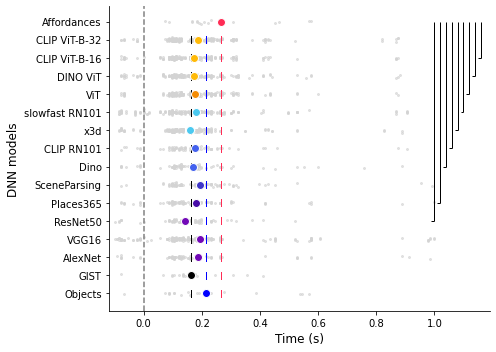

In [17]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

distance_metric = "correlation"

# Assuming correlation_data is your existing dictionary with the required structure
all_values_across_models = []
means = []
models = []
p_values_action = []  # Store p-values for FDR correction
p_values_object = []
p_values_gist = []

# Compute correlations for action, object, and GIST RDMs
mean_action, sem_action, action_array = compute_corrs_average(distance_metric, action_eeg_rdm)
mean_object, sem_object, object_array = compute_corrs_average(distance_metric, object_eeg_rdm)
mean_gist, sem_gist, gist_array = compute_corrs_average(distance_metric, GIST_265)

# Extract values for comparison
action_vals = t[np.argmax(action_array, axis=1)]
object_vals = t[np.argmax(object_array, axis=1)]
gist_vals = t[np.argmax(gist_array, axis=1)]

for model, data in correlation_data.items(): 
    all_values = []
    for row in data['all_highest_values']:
        all_values.extend(row)

    # Compute the mean of the combined list
    models.append(model)
    means.append(np.mean(all_values))
    all_values_across_models.append(all_values)

    # Perform independent t-tests
    t_stat, p_value = stats.ttest_ind(all_values, action_vals, equal_var=False)
    p_values_action.append(p_value)
    t_stat, p_value = stats.ttest_ind(all_values, object_vals, equal_var=False)
    p_values_object.append(p_value)
    t_stat, p_value = stats.ttest_ind(all_values, gist_vals, equal_var=False)
    p_values_gist.append(p_value)

# Retain original order without sorting
original_models = models.copy()
original_means = means.copy()
original_all_values = all_values_across_models.copy()
original_p_values_action = p_values_action.copy()
original_p_values_object = p_values_object.copy()
original_p_values_gist = p_values_gist.copy()

# Apply FDR correction
rejected_action, corrected_p_values_action = multipletests(original_p_values_action, alpha=0.05, method='fdr_bh')[:2]
rejected_object, corrected_p_values_object = multipletests(original_p_values_object, alpha=0.05, method='fdr_bh')[:2]
rejected_gist, corrected_p_values_gist = multipletests(original_p_values_gist, alpha=0.05, method='fdr_bh')[:2]

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 5))

# Plotting for GIST RDM (gray dots)
jitter_gist = np.random.normal(0, 0.05, size=len(t[np.argmax(gist_array, axis=1)]))  # Add jitter
ax.scatter(t[np.argmax(gist_array, axis=1)], [1 + jitter_val for jitter_val in jitter_gist], color='lightgray', alpha=0.6, s=4)
ax.plot(np.mean(t[np.argmax(gist_array, axis=1)]), 1, 'o', color="black", label='GIST', markersize=8, markeredgecolor="white", zorder=10)

# Plotting for Object EEG RDM below GIST
jitter_object = np.random.normal(0, 0.05, size=len(t[np.argmax(object_array, axis=1)]))  # Add jitter
ax.scatter(t[np.argmax(object_array, axis=1)], [0 + jitter_val for jitter_val in jitter_object], color='lightgray', alpha=0.6, s=4)
ax.plot(np.mean(t[np.argmax(object_array, axis=1)]), 0, 'o', color="blue", label='Objects', markersize=8, markeredgecolor="white", zorder=10)

height = 1 

for i, (model, all_values) in enumerate(zip(original_models, original_all_values)):
    i += 2  # Shift by 2 to account for GIST and Object

    subset = df_information[df_information["model"] == model]

    # Plot all values for the model with jitter
    jitter = np.random.normal(0, 0.05, size=len(all_values))
    ax.scatter(all_values, [i + jitter_val for jitter_val in jitter], color='lightgray', alpha=0.6, s=4)

    # Plot the mean value as a colored dot
    ax.plot(original_means[i - 2], i, 'o', color=subset["color"].iloc[0], markersize=8, label=subset["name"].iloc[0], markeredgecolor="white", zorder=10)

    # Add vertical lines for significant differences for action
    if rejected_action[i - 2]:
        ax.vlines(x=height, ymin=i, ymax=15, color='black', linewidth=1)
        ax.hlines(y=i, xmin=height - 0.01, xmax=height, color='black', linewidth=1)
        height += 0.02

    # Add vertical lines for significant differences for object
    if rejected_object[i - 2]:
        ax.vlines(x=height, ymin=0, ymax=i, color='blue', linewidth=1)
        ax.hlines(y=i, xmin=height - 0.01, xmax=height, color='blue', linewidth=1)
        height += 0.02

    # Add vertical lines for significant differences for gist
    if rejected_gist[i - 2]:
        ax.vlines(x=height, ymin=1, ymax=i, color='green', linewidth=1)
        ax.hlines(y=i, xmin=height - 0.01, xmax=height, color='green', linewidth=1)
        height += 0.02

# Plotting for Action EEG RDM at the bottom
jitter_action = np.random.normal(0, 0.05, size=len(t[np.argmax(action_array, axis=1)]))  # Add jitter
ax.scatter(t[np.argmax(action_array, axis=1)], [i + 1 + jitter_val for jitter_val in jitter_action], color='lightgray', alpha=0.6, s=4)
ax.plot(np.mean(t[np.argmax(action_array, axis=1)]), i + 1, 'o', color="#ff2c55", label='Affordances', markersize=8, markeredgecolor="white", zorder=10)

# Plot dashed lines for means
for i in range(15):
    ax.plot([np.mean(t[np.argmax(action_array, axis=1)]), np.mean(t[np.argmax(action_array, axis=1)])], [i - 0.2, i + 0.2], color="#ff2c55", linewidth=1, linestyle="-")
    ax.plot([np.mean(t[np.argmax(object_array, axis=1)]), np.mean(t[np.argmax(object_array, axis=1)])], [i - 0.2, i + 0.2], color="blue", linewidth=1, linestyle="-")
    ax.plot([np.mean(t[np.argmax(gist_array, axis=1)]), np.mean(t[np.argmax(gist_array, axis=1)])], [i - 0.2, i + 0.2], color="black", linewidth=1, linestyle="-")

names = ["AlexNet", "VGG16", "ResNet50", "Places365", "SceneParsing", "Dino", "CLIP RN101", "x3d", "slowfast RN101",
         "ViT", "DINO ViT", "CLIP ViT-B-16", "CLIP ViT-B-32"]

# Set model names on y-axis
sorted_models_2 = ["Objects", "GIST"] + names + ["Affordances"]

# Customize the plot
ax.set_xlim(-0.12, 1.19)
ax.axvline(0, color='gray', linestyle='--')
ax.set_yticks(range(len(sorted_models_2)))
ax.set_yticklabels(sorted_models_2)
ax.set_ylabel('DNN models', fontsize=12)
ax.set_xlabel('Time (s)', fontsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
#plt.savefig(os.path.join(dirname, 'Panel_B_highest_timepoints_DNNs.svg'), transparent = True, dpi = 300)
#plt.show()


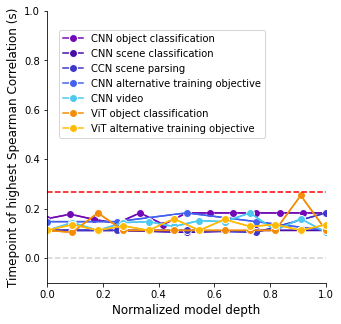

In [18]:
mean_action, sem_action, action_array = compute_corrs_average(distance_metric, action_eeg_rdm)

# Plot settings
fig, ax = plt.subplots(figsize=(5, 5))  # Create the figure and axis objects

# Define colors for each group
colors = ['#7209b7', '#480ca8', '#3f37c9', '#4361ee',  '#4cc9f0', '#f48c06',  '#ffba08']

# Define group information
group_definitions = {
    'CNN object classification': ["AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM"],
    'CNN scene classification': ["Places365_VISACT_RDM"],
    'CCN scene parsing': ["SceneParsing_VISACT_RDM"],
    'CNN alternative training objective': ["DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM"],
    'CNN video': ['x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM'],
    'ViT object classification': ["vit_base_patch16_384__VISACT_90_RDM"],
    'ViT alternative training objective': ["DINO_VIT_BASE_P16", "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"],
}

group_indices = {
    'CNN object classification': [0, 1, 2],
    'CNN scene classification': [3],
    'CCN scene parsing': [4],
    'CNN alternative training objective': [5, 6],
    'CNN video': [7, 8],
    'ViT object classification': [9],
    'ViT alternative training objective': [10, 11, 12],
}

# Plot each group's averaged data
for idx, (group_name, model_indices) in enumerate(group_indices.items()):
    # Initialize lists to hold data for averaging
    y_values = []
    
    # Determine the maximum number of layers in this group
    max_layers = 0
    for model_idx in model_indices:
        df = list(correlation_data.values())[model_idx]  # Access data using the index
        num_layers = len(df['t_highest_corr'])
        if num_layers > max_layers:
            max_layers = num_layers
    
    # Collect data from each model in the group and pad with NaNs if necessary
    for model_idx in model_indices:
        df = list(correlation_data.values())[model_idx]  # Access data using the index
        y = df['t_highest_corr'].values
        
        # Pad with NaNs if the number of layers is less than max_layers
        if len(y) < max_layers:
            y = np.pad(y, (0, max_layers - len(y)), constant_values=np.nan)
        
        y_values.append(y)

    # Convert to numpy arrays and calculate nanmean
    y_avg = np.nanmean(np.array(y_values), axis=0)
    
    # Use positions from the longest model (assuming position is consistent across models)
    x_avg = np.linspace(0, 1, max_layers)
    
    # Plot the averaged data for this group on the axis
    ax.plot(x_avg, y_avg, marker='o', label=group_name, color=colors[idx], markersize=8, markeredgecolor="white")
    ax.plot(x_avg, y_avg, color=colors[idx], markersize=2)

# Add labels and title using ax methods
ax.set_ylim(-0.1, 1)
ax.set_xlabel('Normalized model depth', fontsize=12)
ax.set_ylabel('Timepoint of highest Spearman Correlation (s)', fontsize=12)
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.legend(bbox_to_anchor=(0.8, 0.95))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add horizontal lines using ax methods
ax.axhline(0, color="lightgray", linestyle="--")
ax.axhline(np.mean(t[np.argmax(action_array, axis=1)]), color="red", linestyle="--")

# Save the figure
plt.savefig(os.path.join(dirname, 'Supplementary_highest_timepoint_normalized_model_depth.svg'), transparent = True, dpi = 300)

# Show the plot
plt.show()


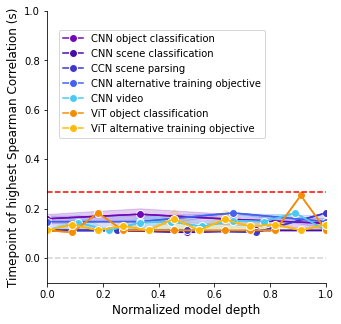

In [19]:
mean_action, sem_action, action_array = compute_corrs_average(distance_metric, action_eeg_rdm)

# Plot settings
fig, ax = plt.subplots(figsize=(5, 5))  # Create the figure and axis objects

# Define colors for each group
colors = ['#7209b7', '#480ca8', '#3f37c9', '#4361ee',  '#4cc9f0', '#f48c06',  '#ffba08']

# Define group information
group_definitions = {
    'CNN object classification': ["AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM"],
    'CNN scene classification': ["Places365_VISACT_RDM"],
    'CCN scene parsing': ["SceneParsing_VISACT_RDM"],
    'CNN alternative training objective': ["DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM"],
    'CNN video': ['x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM'],
    'ViT object classification': ["vit_base_patch16_384__VISACT_90_RDM"],
    'ViT alternative training objective': ["DINO_VIT_BASE_P16", "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"],
}

group_indices = {
    'CNN object classification': [0, 1, 2],
    'CNN scene classification': [3],
    'CCN scene parsing': [4],
    'CNN alternative training objective': [5, 6],
    'CNN video': [7, 8],
    'ViT object classification': [9],
    'ViT alternative training objective': [10, 11, 12],
}

# Plot each group's averaged data
for idx, (group_name, model_indices) in enumerate(group_indices.items()):
    # Initialize lists to hold data for averaging
    y_values = []
    
    # Determine the minimum number of layers in this group
    min_layers = np.inf  # Set a very large number initially
    for model_idx in model_indices:
        df = list(correlation_data.values())[model_idx]  # Access data using the index
        num_layers = len(df['t_highest_corr'])
        if num_layers < min_layers:
            min_layers = num_layers
    
    # Collect data from each model in the group and truncate to the minimum number of layers
    for model_idx in model_indices:
        df = list(correlation_data.values())[model_idx]  # Access data using the index
        y = df['t_highest_corr'].values[:min_layers]  # Truncate data to the minimum number of layers
        y_values.append(y)

    # Convert to numpy arrays and calculate nanmean and nanstd for the SEM
    y_values_np = np.array(y_values)
    y_avg = np.nanmean(y_values_np, axis=0)
    y_sem = np.nanstd(y_values_np, axis=0) / np.sqrt(len(model_indices))  # Calculate SEM
    
    # Use positions from the common number of layers
    x_avg = np.linspace(0, 1, min_layers)
    
    # Plot the averaged data and SEM for this group on the axis
    ax.plot(x_avg, y_avg, marker='o', label=group_name, color=colors[idx], markersize=8, markeredgecolor="white")
    ax.fill_between(x_avg, y_avg - y_sem, y_avg + y_sem, color=colors[idx], alpha=0.2)  # Plot SEM as shaded area
    ax.plot(x_avg, y_avg, color=colors[idx], markersize=2)

# Add labels and title using ax methods
ax.set_ylim(-0.1, 1)
ax.set_xlabel('Normalized model depth', fontsize=12)
ax.set_ylabel('Timepoint of highest Spearman Correlation (s)', fontsize=12)
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.legend(bbox_to_anchor=(0.8, 0.95))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add horizontal lines using ax methods
ax.axhline(0, color="lightgray", linestyle="--")
ax.axhline(np.mean(t[np.argmax(action_array, axis=1)]), color="red", linestyle="--")

# Save the figure
plt.savefig(os.path.join(dirname, 'Supplementary_highest_timepoint_normalized_model_depth_SEM.svg'), transparent = True, dpi = 300)

# Show the plot
plt.show()


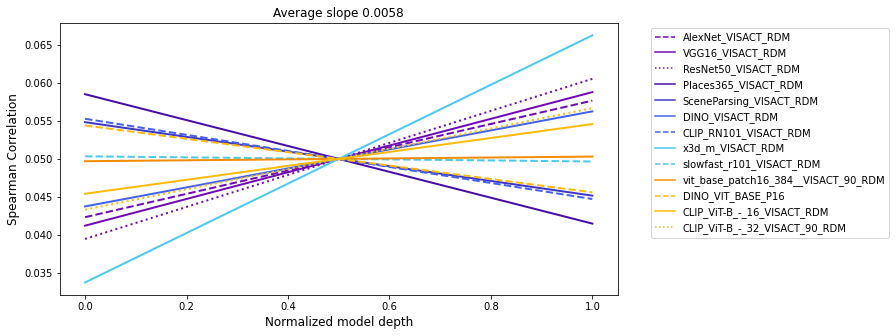

Slopes for each model:
AlexNet_VISACT_RDM: 0.015341919944229962
VGG16_VISACT_RDM: 0.017584472121138547
ResNet50_VISACT_RDM: 0.021074444586491492
Places365_VISACT_RDM: -0.01703400206555585
SceneParsing_VISACT_RDM: -0.009676396524848845
DINO_VISACT_RDM: 0.012518955551373188
CLIP_RN101_VISACT_RDM: -0.010564370829366584
x3d_m_VISACT_RDM: 0.03253311897716079
slowfast_r101_VISACT_RDM: -0.0006781418755477089
vit_base_patch16_384__VISACT_90_RDM: 0.0006083249674990273
DINO_VIT_BASE_P16: -0.00881115747587647
CLIP_ViT-B_-_16_VISACT_RDM: 0.00917359413981103
CLIP_ViT-B_-_32_VISACT_90_RDM: 0.013362953399115389


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib.lines import Line2D

# Define colors and linestyles for each model
colors = [
    '#7209b7', '#7209b7', '#7209b7', "#480ca8", '#3f37c9', 
    '#4361ee', '#4361ee', '#4cc9f0', '#4cc9f0', '#f48c06', 
    '#ffba08', '#ffba08', '#ffba08'
]
linestyles = ["dashed", "solid", "dotted", "solid", "solid", "solid", "dashed", "solid", "dashed", "solid", "dashed", "solid", "dotted"]

# Define the common center point
center_depth = 0.5
center_correlation = 0.05

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 5))

# To store slopes for each model
slopes = []
idx = 0

for model_name, data in correlation_data.items():
    # Prepare data
    x = np.array(data['position']).reshape(-1, 1)  # Normalized model depth (position)
    y = data['higest_corr_value']  # Highest correlation values

    # Fit linear regression
    model = LinearRegression().fit(x, y)
    slope = model.coef_[0]  # Extract slope
    intercept = model.intercept_

    # Adjust intercept to make the regression line pass through the center point
    adjusted_intercept = center_correlation - slope * center_depth
    adjusted_y = slope * x + adjusted_intercept  # Adjusted y values for the regression line

    # Plot data points connected by a line and the fitted regression line
    ax.plot(x, adjusted_y, color=colors[idx], linestyle=linestyles[idx], linewidth=2)

    slopes.append((model_name, slope))
    idx += 1


slope_values = [slope for _, slope in slopes]
average_slope = np.mean(slope_values)

# Customize plot appearance
ax.set_xlabel("Normalized model depth", fontsize=12)
ax.set_ylabel("Spearman Correlation", fontsize=12)
ax.set_title(f"Average slope {average_slope.round(5)}")

# Add legend
legend_lines = [Line2D([0], [0], color=colors[i], linestyle=linestyles[i]) for i in range(len(correlation_data))]
ax.legend(legend_lines, correlation_data.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Print slopes for all models
print("Slopes for each model:")
for model, slope in slopes:
    print(f"{model}: {slope}")


/tmp/ipykernel_3449442/2742493984.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(x_vals, y_vals, 'o-', color=row['Color'], linestyle=row['Linestyle'],
/tmp/ipykernel_3449442/2742493984.py:57: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax2.plot(x_vals, y_vals, 'o-', color=row['Color'], linestyle=row['Linestyle'],


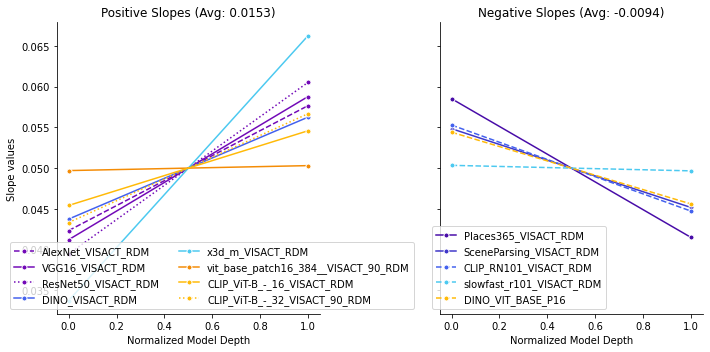

In [22]:
colors = [
    '#7209b7', '#7209b7', '#7209b7', "#480ca8", '#3f37c9', 
    '#4361ee', '#4361ee', '#4cc9f0', '#4cc9f0', '#f48c06', 
    '#ffba08', '#ffba08', '#ffba08'
]

linestyles = ["dashed", "solid", "dotted", "solid", "solid", "solid", "dashed", "solid", "dashed", "solid", "dashed", "solid", "dotted"]

# Combine data into a DataFrame
df = pd.DataFrame({
    "Model Name": [item[0] for item in slopes],
    "Slope": [item[1] for item in slopes],
    "Color": colors,
    "Linestyle": linestyles
})


# Separate positive and negative slopes
positive_df = df[df['Slope'] > 0]
negative_df = df[df['Slope'] < 0]

# Calculate average slopes
avg_positive_slope = positive_df['Slope'].mean()
avg_negative_slope = negative_df['Slope'].mean()

# Define the common center point
center_depth = 0.5
center_correlation = 0.05

# Set up the plot with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot positive slopes
for idx, row in positive_df.iterrows():
    slope = row['Slope']
    adjusted_intercept = center_correlation - slope * center_depth
    x_vals = np.array([0, 1])
    y_vals = slope * x_vals + adjusted_intercept
    ax1.plot(x_vals, y_vals, 'o-', color=row['Color'], linestyle=row['Linestyle'], 
             markersize=5, label=row['Model Name'], markeredgecolor="white")

ax1.set_title(f"Positive Slopes (Avg: {avg_positive_slope:.4f})")
ax1.set_xlabel("Normalized Model Depth")
ax1.set_ylabel("Slope values")
ax1.legend(loc="lower center", bbox_to_anchor=(0.59, 0), ncol=2)
# Remove the top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)


# Plot negative slopes
for idx, row in negative_df.iterrows():
    slope = row['Slope']
    adjusted_intercept = center_correlation - slope * center_depth
    x_vals = np.array([0, 1])
    y_vals = slope * x_vals + adjusted_intercept
    ax2.plot(x_vals, y_vals, 'o-', color=row['Color'], linestyle=row['Linestyle'], 
             markersize=5, label=row['Model Name'], markeredgecolor="white")

ax2.set_title(f"Negative Slopes (Avg: {avg_negative_slope:.4f})")
ax2.set_xlabel("Normalized Model Depth")
ax2.legend(loc="lower center", bbox_to_anchor=(0.3, 0), ncol=1)
# Remove the top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
# Show the plots
plt.savefig(os.path.join(dirname, 'Supplementary_Slopes.svg'), transparent = True, dpi = 300)
plt.tight_layout()
plt.show()


In [23]:
def compute_mean_df_without_nan(*dfs):
    """
    This function takes any number of dataframes containing 'higest_corr_value' and 'position'
    columns, reduces them to the lowest common number of layers, and finds the closest matching 
    positions for models with more layers. It then computes the mean using nanmean.

    Args:
        dfs: Any number of input dataframes containing 'higest_corr_value' and 'position'.

    Returns:
        mean_df: A dataframe with aligned positions and the mean of the 'higest_corr_value' across all input dataframes.
    """
    # Step 1: Find the minimum number of layers across all dataframes
    min_layers = min([len(df) for df in dfs])

    # Step 2: Generate reference positions based on the model with the fewest layers
    # We'll use the positions from the dataframe with the fewest layers as the reference
    ref_positions = np.linspace(0, 1, min_layers)

    # Step 3: Reindex each dataframe to match the reference positions by finding the closest positions
    reindexed_dfs = []
    for df in dfs:
        positions = df['position'].values
        values = df['higest_corr_value'].values
        
        # For each reference position, find the closest matching position in the current model
        closest_values = np.interp(ref_positions, positions, values)
        reindexed_dfs.append(closest_values)
    
    # Step 4: Stack the reindexed values and compute the mean
    stacked_values = np.vstack(reindexed_dfs)
    mean_values = np.nanmean(stacked_values, axis=0)

    # Step 5: Create a new dataframe with the mean values and the reference positions
    mean_df = pd.DataFrame({
        'position': ref_positions,
        'mean_higest_corr_value': mean_values
    })

    return mean_df

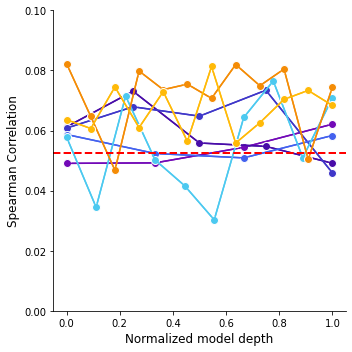

In [24]:

# Group indices as given
group_indices = {
    'CNN object classification': [0, 1, 2],
    'CNN scene classification': [3],
    'CCN scene parsing': [4],
    'CNN alternative training objective': [5, 6],
    'CNN video': [7, 8],
    'ViT object classification': [9],
    'ViT alternative training objective': [10, 11, 12],
}

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Define colors for each group
colors = ['#7209b7', '#480ca8', '#3f37c9', '#4361ee', '#4cc9f0', '#f48c06', '#ffba08']

# Iterate over each group and its corresponding indices
for idx, (group_name, model_indices) in enumerate(group_indices.items()):
    # Extract the dataframes for the models in this group
    group_dfs = [list(correlation_data.values())[model_idx] for model_idx in model_indices]

    # Compute the mean dataframe for this group
    mean_df = compute_mean_df_without_nan(*group_dfs)

    # Plot the mean values on the axis
    ax.plot(mean_df['position'], mean_df['mean_higest_corr_value'], marker='o', label=group_name, color=colors[idx], markersize=8, markeredgecolor="white")
    ax.plot(mean_df['position'], mean_df['mean_higest_corr_value'], color=colors[idx], markersize=2)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
ax.set_ylim(0, 0.10)
ax.set_xlabel('Normalized model depth', fontsize=12)
ax.set_ylabel('Spearman Correlation', fontsize=12)

# Add a legend, placing it to the right of the plot
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add a horizontal line for the "Affordances" mean value 
ax.axhline(np.max(mean_action), color="red", linestyle="--", linewidth=2)

# Tight layout for the plot to avoid overlapping elements
fig.tight_layout()

plt.savefig(os.path.join(dirname, 'Supplementary_highest_correlation_normalized_model_depth.svg'), transparent = True, dpi = 300)
# Show the plot
plt.show()


In [25]:
def compute_mean_df_and_sem_without_nan(*dfs):
    """
    This function takes any number of dataframes containing 'higest_corr_value' and 'position'
    columns, reduces them to the lowest common number of layers, and finds the closest matching 
    positions for models with more layers. It then computes the mean and the standard error of the mean (SEM) using nanmean.

    Args:
        dfs: Any number of input dataframes containing 'higest_corr_value' and 'position'.

    Returns:
        mean_df: A dataframe with aligned positions, the mean of the 'higest_corr_value' across all input dataframes,
                 and the SEM of the 'higest_corr_value'.
    """
    # Step 1: Find the minimum number of layers across all dataframes
    min_layers = min([len(df) for df in dfs])

    # Step 2: Generate reference positions based on the model with the fewest layers
    ref_positions = np.linspace(0, 1, min_layers)

    # Step 3: Reindex each dataframe to match the reference positions by finding the closest positions
    reindexed_dfs = []
    for df in dfs:
        positions = df['position'].values
        values = df['higest_corr_value'].values
        
        # For each reference position, find the closest matching position in the current model
        closest_values = np.interp(ref_positions, positions, values)
        reindexed_dfs.append(closest_values)
    
    # Step 4: Stack the reindexed values and compute the mean and SEM
    stacked_values = np.vstack(reindexed_dfs)
    mean_values = np.nanmean(stacked_values, axis=0)
    sem_values = np.nanstd(stacked_values, axis=0) / np.sqrt(len(dfs))

    # Step 5: Create a new dataframe with the mean values, SEM, and the reference positions
    mean_df = pd.DataFrame({
        'position': ref_positions,
        'mean_higest_corr_value': mean_values,
        'sem_higest_corr_value': sem_values
    })

    return mean_df


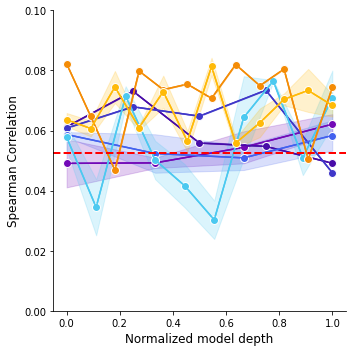

In [26]:
# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Define colors for each group
colors = ['#7209b7', '#480ca8', '#3f37c9', '#4361ee', '#4cc9f0', '#f48c06', '#ffba08']

# Iterate over each group and its corresponding indices
for idx, (group_name, model_indices) in enumerate(group_indices.items()):
    # Extract the dataframes for the models in this group
    group_dfs = [list(correlation_data.values())[model_idx] for model_idx in model_indices]

    # Compute the mean and SEM dataframe for this group
    mean_df = compute_mean_df_and_sem_without_nan(*group_dfs)

    # Plot the mean values on the axis
    ax.plot(mean_df['position'], mean_df['mean_higest_corr_value'], marker='o', label=group_name, 
            color=colors[idx], markersize=8, markeredgecolor="white")
    
    ax.plot(mean_df['position'], mean_df['mean_higest_corr_value'], color=colors[idx], markersize=2)
    
    # Plot the shaded region for SEM
    ax.fill_between(mean_df['position'], 
                    mean_df['mean_higest_corr_value'] - mean_df['sem_higest_corr_value'], 
                    mean_df['mean_higest_corr_value'] + mean_df['sem_higest_corr_value'], 
                    color=colors[idx], alpha=0.2)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
ax.set_ylim(0, 0.10)
ax.set_xlabel('Normalized model depth', fontsize=12)
ax.set_ylabel('Spearman Correlation', fontsize=12)

# Add a horizontal line for the "Affordances" mean value
ax.axhline(np.max(mean_action), color="red", linestyle="--", linewidth=2)

# Tight layout for the plot to avoid overlapping elements
fig.tight_layout()

plt.savefig(os.path.join(dirname, 'Supplementary_highest_correlation_normalized_model_depth_SEM.svg'), transparent = True, dpi = 300)

# Show the plot
plt.show()


In [27]:
import numpy as np
from scipy.spatial.distance import squareform
import pingouin as pg

def partial_corr_with_model_pingouin(rdm1, model_rdm1, model_rdm2):
    corrs = []
    for timepoint in range(rdm1.shape[0]):
        rdv1 = squareform(rdm1[timepoint].round(10))   # ERP RDM (timepoint specific)
        rdv_model1 = squareform(model_rdm1.round(10))  # Model RDM1 (e.g., action)
        rdv_model2 = squareform(model_rdm2.round(10))  # Model RDM2 (e.g., GIST_256)
        
        # Prepare the data for Pingouin's partial correlation
        data = np.column_stack([rdv1, rdv_model1, rdv_model2])
        df = pd.DataFrame(data, columns=['RDM1', 'Model1', 'Model2'])
        
        # Calculate partial correlation (between RDM1 and Model1, controlling for Model2)
        partial_corr_result = pg.partial_corr(data=df, x='Model1', y='RDM1', covar='Model2', method='spearman')
        
        # Extract partial correlation coefficient
        partial_corr = partial_corr_result['r'].values[0]
        corrs.append(partial_corr)
    
    # Compute the mean correlation across timepoints
    mean_corr = np.mean(corrs)

    return mean_corr, corrs


In [28]:
import os

def compute_partial_corrs_sliding(distance_metric, n, model_rdm1, model_rdm2):
    path = os.path.join("/home/clemens-uva/Desktop/EEG---temporal-dynamics-of-affordance-perception", 'RDMs/ERP_sliding_window_RDMs/')
    
    all_sub_corrs = []
    for file in os.listdir(path):
        if (distance_metric in file) and (n in file):
            rdms_per_subject = np.load(path + file)
            mean_corr, corrs = partial_corr_with_model_pingouin(rdms_per_subject, model_rdm1, model_rdm2)
            all_sub_corrs.append(corrs)
    
    mean_corr = np.mean(np.array(all_sub_corrs), axis=0)
    sem = np.std(all_sub_corrs, axis=0) / np.sqrt(len(all_sub_corrs))

    return mean_corr, sem, np.array(all_sub_corrs)

In [29]:
def significant_against_zero(array):
    
    t_values, p_values = ttest_1samp(array, 0, axis=0)
    # Adjust p-values for FDR using Benjamini-Hochberg procedure
    alpha = 0.05
    reject, pvals_corrected, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')
    # Output the results
    significant_timepoints = np.where(reject)[0]


    return significant_timepoints


In [30]:
def lowest_value(array1, array2):
    """
    Finds the lowest value between two arrays and returns it.

    Parameters:
    - array1: First numpy array.
    - array2: Second numpy array.

    Returns:
    - The lowest value found in both arrays.
    """

    # Find the minimum of each array
    min1 = np.min(array1)
    min2 = np.min(array2)
    
    # Return the minimum of both values
    return min(min1, min2)

In [31]:
import os
import numpy as np
import pandas as pd

distance_metric = "correlation"

# Initialize a dictionary to store data for each model
DNN_RDMs = {}

# Paths and models
DDN_path = "/home/clemens-uva/Github_repos/Visact_fMRI/code/DNN_RDMS/"
model_list = ["AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM", "Places365_VISACT_RDM", 
    "SceneParsing_VISACT_RDM", "DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM", 
    'x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM',
    "vit_base_patch16_384__VISACT_90_RDM", "DINO_VIT_BASE_P16", 
    "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"]

# For each model, we will store a DataFrame with layer correlations
for model in model_list:
    # Initialize a sub-dictionary for this model
    DNN_RDMs[model] = {}

    layer_list = os.listdir(DDN_path + model)
    # Remove .json files
    layer_list = [x for x in layer_list if not '.json' in x]
    
    for idx, layer in enumerate(layer_list):
        layer_name = f"layer{idx + 1}" 
        layer_file = np.load(f"{DDN_path}{model}/{layer}", allow_pickle=True)
        layer_rdm = layer_file["arr_0"]
        rdm_df = pd.DataFrame(layer_rdm)
        rdm_df.index = fmri_ordering  
        rdm_df.columns = fmri_ordering  
        
        # Sorting RDM based on image names
        sorted_rdm = rdm_df.loc[images_name, images_name].values  

        # Store the sorted RDM in the dictionary
        DNN_RDMs[model][layer_name] = sorted_rdm


In [ ]:
###### LONG RUNTIME######

import os
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform
import pingouin as pg

# Assuming you have these model RDMs already loaded:
model_rdms = {
    "action_eeg_rdm": action_eeg_rdm,
    "object_eeg_rdm": object_eeg_rdm,
    "GIST_265": GIST_265
}

# Dictionary to store the results
partial_corr_results = {}

# Loop through all models and layers
for model_name, layers_dict in DNN_RDMs.items():
    partial_corr_results[model_name] = {}  # Initialize dict for each model
    
    for layer_name, layer_rdm in layers_dict.items():
        partial_corr_results[model_name][layer_name] = {}  # Initialize dict for each layer

        # First, compute the base correlation of the layer with the EEG signal
        mean_corr, sem_corr, base_corrs = compute_corrs_average(distance_metric, layer_rdm)
        
        # Store the base correlation results
        partial_corr_results[model_name][layer_name]['base_corr'] = {
            "mean_corr": mean_corr,
            "sem_corr": sem_corr,
            "corrs": base_corrs
        }

        # Then, compare with each model RDM for partial correlation
        for rdm_name, model_rdm in model_rdms.items():
            # Compute partial correlation results
            mean_partial_corr, sem_partial_corr, partial_corrs = compute_partial_corrs_sliding(distance_metric, "_5_", layer_rdm, model_rdm)

            # Store the partial correlation results
            partial_corr_results[model_name][layer_name][rdm_name] = {
                "mean_partial_corr": mean_partial_corr,
                "sem_partial_corr": sem_partial_corr,
                "partial_corrs": partial_corrs
            }


In [47]:
output_file2 = "/home/clemens-uva/Desktop/EEG_Temporal_misalignment/03_DNN/partial_corr_results.pkl"

with open(output_file2, "wb") as f:
    pickle.dump(partial_corr_results, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Saved correlation data to {output_file2}")

Saved correlation data to /home/clemens-uva/Desktop/EEG_Temporal_misalignment/03_DNN/partial_corr_results.pkl


In [33]:
model_list = [
    "AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM", "Places365_VISACT_RDM", 
    "SceneParsing_VISACT_RDM", "DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM", 
    'x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM',
    "vit_base_patch16_384__VISACT_90_RDM", "DINO_VIT_BASE_P16", 
    "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"
]

In [34]:
import numpy as np

def compute_auc_for_layer_across_models(model_list, rdm_name, layer, partial_corr_results):
    """
    Computes the Area Under the Curve (AUC) for the mean partial correlation for specified layer 
    across all models in model_list for a specified model RDM.
    
    Parameters:
        model_list (list): List of model names to consider.
        rdm_name (str): The model RDM name to use (e.g., 'action_eeg_rdm').
        partial_corr_results (dict): Dictionary containing the partial correlation results.
    
    Returns:
        auc_results (dict): Dictionary with model names as keys and AUC values for 'layer1' as values.
    """
    auc_results = {}  # Dictionary to store AUC results for each model
    
    for model in model_list:
        # Check if the model, 'layer1', and the specified RDM exist in the dictionary
        if (model in partial_corr_results and 
            layer in partial_corr_results[model] and
            rdm_name in partial_corr_results[model][layer]):
            
            # Extract mean partial correlation for layer1 and the given RDM
            if rdm_name == "base_corr":
                mean_partial_corr =  partial_corr_results[model][layer]["base_corr"]["mean_corr"]
            else:
                mean_partial_corr = partial_corr_results[model][layer][rdm_name]['mean_partial_corr']
        
            
            # Compute the Area Under the Curve (AUC) using the trapezoidal rule
            auc = np.trapz(mean_partial_corr)  # Assuming equal spacing of timepoints
            
            # Store the AUC result for this model
            auc_results[model] = auc
    
    return auc_results


In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

def plot_auc_and_test_significance(layer, model_list, partial_corr_results):
    """
    Plots the AUC values for the base correlation and two model RDMs (Action and GIST),
    and performs statistical testing (Mann-Whitney U test), with FDR correction for multiple comparisons.
    
    Parameters:
        layer (str): The layer of the DNN model to analyze.
        model_list (list): List of models to use for AUC calculations.
        partial_corr_results (dict): Dictionary containing the partial correlation results.
    """

    def add_significance_bar(ax, x1, x2, y, text):
        """ Adds a black bar with asterisks to indicate significance between two groups. """
        ax.plot([x1, x1, x2, x2], [y, y+0.02, y+0.02, y], color='black', lw=1.5)
        ax.text((x1 + x2) * 0.5, y + 0.02, text, ha='center', va='bottom', color='black')

    # Example: AUC values for each RDM
    base_auc = list(compute_auc_for_layer_across_models(model_list, 'base_corr', layer, partial_corr_results).values())
    action_auc = list(compute_auc_for_layer_across_models(model_list, 'action_eeg_rdm', layer, partial_corr_results).values())
    gist_auc = list(compute_auc_for_layer_across_models(model_list, 'GIST_265', layer, partial_corr_results).values())

    # Create x positions for scatter plot
    x_base = np.ones(len(base_auc)) * 1
    x_action = np.ones(len(action_auc)) * 2
    x_gist = np.ones(len(gist_auc)) * 3

    # Calculate mean AUC values
    mean_base_auc = np.mean(base_auc)
    mean_action_auc = np.mean(action_auc)
    mean_gist_auc = np.mean(gist_auc)

    # Plot the scatter plot
    fig, ax = plt.subplots(figsize=(4, 4))

    # Scatter points
    ax.scatter(x_base + np.random.normal(0, 0.05, size=len(base_auc)), base_auc, color='black', alpha=0.7, label='Base Correlation')
    ax.scatter(x_action + np.random.normal(0, 0.05, size=len(action_auc)), action_auc, color='#ff2c55', alpha=0.7, label='Action EEG RDM')
    ax.scatter(x_gist + np.random.normal(0, 0.05, size=len(gist_auc)), gist_auc, color='#ee9b00', alpha=0.7, label='GIST 265 RDM')

    # Plot horizontal lines for mean AUC values
    ax.hlines(mean_base_auc, 0.85, 1.15, colors='black', linestyles='dashed', linewidth=2)
    ax.hlines(mean_action_auc, 1.85, 2.15, colors='#ff2c55', linestyles='dashed', linewidth=2)
    ax.hlines(mean_gist_auc, 2.85, 3.15, colors='#ee9b00', linestyles='dashed', linewidth=2)

    # Customize plot
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Base Corr', 'Action EEG RDM', 'GIST 265 RDM'])
    ax.set_xlabel('Model RDMs')
    ax.set_ylabel('AUC')
    ax.set_title(f'AUC Values for {layer} Across Models')
    ax.legend()

    # Perform pairwise statistical tests using Mann-Whitney U
    u_stat_base_act, p_val_base_act = mannwhitneyu(base_auc, action_auc)
    u_stat_base_gist, p_val_base_gist = mannwhitneyu(base_auc, gist_auc)
    u_stat_act_gist, p_val_act_gist = mannwhitneyu(action_auc, gist_auc)

    # Collect p-values for FDR correction
    p_values = [p_val_base_act, p_val_base_gist, p_val_act_gist]

    # Apply FDR correction (Benjamini-Hochberg method)
    _, p_values_corrected, _, _ = multipletests(p_values, method='fdr_bh')

    # Set a threshold for significance (e.g., FDR corrected p < 0.05)
    significance_threshold = 0.05
    y_max = max([max(base_auc), max(action_auc), max(gist_auc)]) + 0.5

    # Add significance bars if the tests are significant after FDR correction
    if p_values_corrected[0] < significance_threshold:
        add_significance_bar(ax, 1, 2, y_max, '*')  # Base vs Action
        y_max += 0.1

    if p_values_corrected[1] < significance_threshold:
        add_significance_bar(ax, 1, 3, y_max, '*')  # Base vs GIST
        y_max += 0.1

    if p_values_corrected[2] < significance_threshold:
        add_significance_bar(ax, 2, 3, y_max, '*')  # Action vs GIST

    plt.tight_layout()
    plt.show()

    # Print pairwise test results
    print(f"Base vs Action RDM: U-statistic = {u_stat_base_act}, p-value (FDR corrected) = {p_values_corrected[0]}")
    print(f"Base vs GIST RDM: U-statistic = {u_stat_base_gist}, p-value (FDR corrected) = {p_values_corrected[1]}")
    print(f"Action vs GIST RDM: U-statistic = {u_stat_act_gist}, p-value (FDR corrected) = {p_values_corrected[2]}")


In [36]:
def normalize_layers(layers):
    """Normalizes layer indices between 0 and 1 for a given list of layers."""
    n_layers = len(layers)
    return [i / (n_layers - 1) for i in range(n_layers)] if n_layers > 1 else [0]

def reduce_layers_to_common(models_layers):
    """Reduces layers to the least common number of layers across all models."""
    min_num_layers = min(len(layers) for layers in models_layers.values())
    target_positions = np.linspace(0, 1, min_num_layers)
    
    reduced_layers = {}
    for model_name, layers in models_layers.items():
        normalized_positions = normalize_layers(layers)
        selected_layers = [layers[np.argmin([abs(target_pos - pos) for pos in normalized_positions])] for target_pos in target_positions]
        reduced_layers[model_name] = selected_layers
    return reduced_layers

def filter_and_rename_layers(partial_corr_results, reduced_layers):
    """Filters and renames layers to 'layer1', 'layer2', etc. in the partial_corr_results dictionary."""
    filtered_renamed_results = {}
    
    for model_name, layers_dict in partial_corr_results.items():
        if model_name in reduced_layers:
            filtered_renamed_results[model_name] = {}
            selected_layers = reduced_layers[model_name]
            for i, layer_name in enumerate(selected_layers, start=1):
                if layer_name in layers_dict:
                    filtered_renamed_results[model_name][f'layer{i}'] = layers_dict[layer_name]
                    
    return filtered_renamed_results

# Example dictionary of models and layers
models_layers = {
    "AlexNet_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "VGG16_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12", "layer13"],
    "ResNet50_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4"],
    "Places365_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "SceneParsing_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "DINO_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "CLIP_RN101_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4"],
    "x3d_m_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10"],
    "slowfast_r101_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "vit_base_patch16_384__VISACT_90_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "DINO_VIT_BASE_P16": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "CLIP_ViT-B_-_16_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "CLIP_ViT-B_-_32_VISACT_90_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"]
}

# Assuming partial_corr_results is the dictionary with correlation results.
# Step-by-step usage:
reduced_layers = reduce_layers_to_common(models_layers)
filtered_and_renamed_results = filter_and_rename_layers(partial_corr_results, reduced_layers)



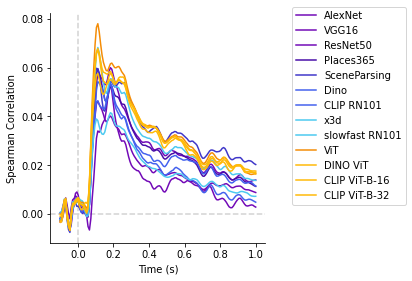

In [37]:
def plot_averaged_correlations_per_model(model_list, colors, names, filtered_and_renamed_results):
    """
    Plots the averaged correlations across layers for each model in the model_list with specified colors and names.
    
    Parameters:
        model_list (list): List of models to include in the plotting.
        colors (list): List of colors to use for each model.
        names (list): List of display names for each model in the legend.
        filtered_and_renamed_results (dict): Dictionary containing correlation results for each model and layer.
    """
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.axvline(x=0, color='lightgray', linestyle='--')
    ax.axhline(y=0, color='lightgray', linestyle='--')

    # Loop through each model in the list
    for i, model_name in enumerate(model_list):
        model_data = filtered_and_renamed_results.get(model_name, {})
        
        # Collect all layers' correlations (assuming 'layer1' to 'layer4')
        layer_correlations = []
        for layer_name in model_data:
            layer_corr = model_data[layer_name]["base_corr"]["mean_corr"]
            layer_correlations.append(layer_corr)
        
        # Compute the average correlation across the 4 layers for this model
        if layer_correlations:
            avg_correlations = np.mean(layer_correlations, axis=0)
            

            # Plot the averaged correlation for the model using the corresponding color and name
            ax.plot(t, avg_correlations, label=names[i], color=colors[i])

    # Add labels and title
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Spearman Correlation')
    #ax.set_title('Averaged Correlations Across Layers for Each Model')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add a legend
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    # Tight layout to avoid overlapping of elements
    fig.tight_layout()
    # save Figure 
    plt.savefig(os.path.join(dirname, 'Additional_Panel_A_average_DNN_corrs.svg'), transparent = True, dpi = 300)
    
    # Show the plot
    plt.show()

# Example usage:
model_list = [
    "AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM", "Places365_VISACT_RDM", 
    "SceneParsing_VISACT_RDM", "DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM", 
    'x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM',
    "vit_base_patch16_384__VISACT_90_RDM", "DINO_VIT_BASE_P16", 
    "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"
]

colors = [
    '#7209b7', '#7209b7', '#7209b7', "#480ca8", '#3f37c9', 
    '#4361ee', '#4361ee', '#4cc9f0', '#4cc9f0', '#f48c06', 
    '#ffba08', '#ffba08', '#ffba08'
]

names = ["AlexNet", "VGG16", "ResNet50",
         "Places365", "SceneParsing",
         "Dino", "CLIP RN101", "x3d", "slowfast RN101",
         "ViT", "DINO ViT", "CLIP ViT-B-16", "CLIP ViT-B-32"]

plot_averaged_correlations_per_model(model_list, colors, names, filtered_and_renamed_results)


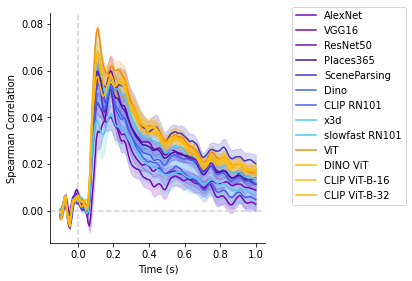

In [38]:
def plot_averaged_correlations_per_model_with_sem(model_list, colors, names, filtered_and_renamed_results):
    """
    Plots the averaged correlations across layers for each model in the model_list, 
    with shaded regions representing the SEM between the layers.
    
    Parameters:
        model_list (list): List of models to include in the plotting.
        colors (list): List of colors to use for each model.
        names (list): List of display names for each model in the legend.
        filtered_and_renamed_results (dict): Dictionary containing correlation results for each model and layer.
    """
    # Initialize the figure and axis
    fig, ax = plt.subplots()
    ax.axvline(x=0, color='lightgray', linestyle='--')
    ax.axhline(y=0, color='lightgray', linestyle='--')

    # Loop through each model in the list
    for i, model_name in enumerate(model_list):
        model_data = filtered_and_renamed_results.get(model_name, {})
        
        # Collect all layers' correlations (assuming 'layer1' to 'layer4')
        layer_correlations = []
        for layer_name in model_data:
            layer_corr = model_data[layer_name]["base_corr"]["mean_corr"]
            layer_correlations.append(layer_corr)
        
        # Compute the average correlation across the layers and the SEM
        if layer_correlations:
            layer_correlations = np.array(layer_correlations)
            avg_correlations = np.mean(layer_correlations, axis=0)
            sem_correlations = np.std(layer_correlations, axis=0) / np.sqrt(len(layer_correlations))

            # Plot the averaged correlation for the model using the corresponding color and name
            ax.plot(t, avg_correlations, label=names[i], color=colors[i])

            # Plot the SEM as shaded area
            ax.fill_between(t, avg_correlations - sem_correlations, avg_correlations + sem_correlations, 
                            color=colors[i], alpha=0.2)

    # Add labels and title
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Spearman Correlation')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add a legend
    ax.legend(bbox_to_anchor=(1.1, 1.05))

    # Tight layout to avoid overlapping of elements
    fig.tight_layout()

    #save figure
    plt.savefig(os.path.join(dirname, 'Panel_A_average_DNN_corrs_SEM.svg'), transparent = True, dpi = 300)
    
    # Show the plot
    plt.show()

# Example usage:
model_list = [
    "AlexNet_VISACT_RDM", "VGG16_VISACT_RDM", "ResNet50_VISACT_RDM", "Places365_VISACT_RDM", 
    "SceneParsing_VISACT_RDM", "DINO_VISACT_RDM", "CLIP_RN101_VISACT_RDM", 
    'x3d_m_VISACT_RDM', 'slowfast_r101_VISACT_RDM',
    "vit_base_patch16_384__VISACT_90_RDM", "DINO_VIT_BASE_P16", 
    "CLIP_ViT-B_-_16_VISACT_RDM", "CLIP_ViT-B_-_32_VISACT_90_RDM"
]

colors = [
    '#7209b7', '#7209b7', '#7209b7', "#480ca8", '#3f37c9', 
    '#4361ee', '#4361ee', '#4cc9f0', '#4cc9f0', '#f48c06', 
    '#ffba08', '#ffba08', '#ffba08'
]

names = ["AlexNet", "VGG16", "ResNet50",
         "Places365", "SceneParsing",
         "Dino", "CLIP RN101", "x3d", "slowfast RN101",
         "ViT", "DINO ViT", "CLIP ViT-B-16", "CLIP ViT-B-32"]

plot_averaged_correlations_per_model_with_sem(model_list, colors, names, filtered_and_renamed_results)


In [39]:

def plot_average_partial_correlations(models, rdm_names, filtered_and_renamed_results, savepath, base_corr_results=None, colors=None, names=None):
    """
    Plots the average partial correlation results across layers for the given model(s) and RDM(s), using specified colors and names.
    
    Parameters:
        models (str or list): The model name(s) to plot.
        rdm_names (str or list): The model RDM name(s) to use (e.g., 'action_eeg_rdm', 'object_eeg_rdm', 'GIST_265').
        filtered_and_renamed_results (dict): The dictionary containing filtered and renamed partial correlation results.
        base_corr_results (dict): The dictionary containing base correlation results (optional).
        colors (list): List of colors to use for each model.
        names (list): List of names to use for labeling each model.
    """
    if isinstance(models, str):
        models = [models]  # Convert a single model to a list
    if isinstance(rdm_names, str):
        rdm_names = [rdm_names]  # Convert a single RDM to a list

    # Ensure colors and names match the models list length
    if colors is None or len(colors) < len(models):
        raise ValueError("The length of 'colors' must match the number of models.")
    if names is None or len(names) < len(models):
        raise ValueError("The length of 'names' must match the number of models.")

    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(4,4))

    # Add horizontal and vertical reference lines
    ax.axvline(x=0, color='lightgray', linestyle='--')
    ax.axhline(y=0, color='lightgray', linestyle='--')

    # Plot average partial correlations for each model and RDM
    for i, model in enumerate(models):
        color = colors[i]
        name = names[i]
        
        for rdm_name in rdm_names:
            # Check if the model and RDM exist in the dictionary
            if model in filtered_and_renamed_results and rdm_name in filtered_and_renamed_results[model]:
                # Collect the mean correlations for layers 1 to 4
                layer_corrs = []
                
                for layer_name in ['layer1', 'layer2', 'layer3', 'layer4']:
                    # Check if the layer exists in the data
                    if layer_name in filtered_and_renamed_results[model][rdm_name] and 'mean_partial_corr' in filtered_and_renamed_results[model][rdm_name][layer_name]:
                        mean_corr = filtered_and_renamed_results[model][rdm_name][layer_name]['mean_partial_corr']
                        layer_corrs.append(mean_corr)
                
                # Calculate the average mean correlation across layers
                if layer_corrs:
                    average_mean_corr = np.mean(layer_corrs, axis=0)
                    
                    # Plot the average mean correlation with the assigned color
                    ax.plot(t, average_mean_corr, label=f'{name} {rdm_name} (Avg)', color=color)


    if base_corr_results == "object_eeg_rdm":
        mean_action, sem_action, action_array = compute_corrs_average(distance_metric, object_eeg_rdm)
        # Plot the mean base correlation with a different color
        ax.plot(t, mean_action, label=f'Base {rdm_name}', color="black", linestyle='--')
        # Increment plot counter for color selection
        #plot_idx += 1

    elif base_corr_results == "action_eeg_rdm":
        mean_action, sem_action, action_array = compute_corrs_average(distance_metric, action_eeg_rdm)
        # Plot the mean base correlation with a different color
        ax.plot(t, mean_action, label=f'Base {rdm_name}', color="black", linestyle='--')
        # Increment plot counter for color selection
        #plot_idx += 1
    elif base_corr_results == "GIST_265":
        mean_action, sem_action, action_array = compute_corrs_average(distance_metric, GIST_265)
        # Plot the mean base correlation with a different color
        ax.plot(t, mean_action, label=f'Base {rdm_name}', color="black", linestyle='--')
        # Increment plot counter for color selection
        #plot_idx += 1
    else:
        print("yes")


    ax.set_ylim(-0.015, 0.06)
    # Labeling the plot
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Partial Correlation')
    #plt.legend(bbox_to_anchor=(1.1, 1.05))
    
    # Clean up the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(savepath, transparent=True, dpi=300)
    # Show the plot
    plt.show()



In [ ]:
###### LONG RUNTIME######

model_rdms = {
    "action_eeg_rdm": action_eeg_rdm,
    "object_eeg_rdm": object_eeg_rdm,
    "GIST_265": GIST_265
}

# Dictionary to store the results
partial_corr_results_2 = {}

# Loop through all models and layers
for model_name, layers_dict in DNN_RDMs.items():
    partial_corr_results_2[model_name] = {}  # Initialize dict for each model

    for layer_name, layer_rdm in layers_dict.items():
        # First, compute the base correlation of the layer with the EEG signal
        mean_corr, sem_corr, base_corrs = compute_corrs_average(distance_metric, layer_rdm)
        
        # Store the base correlation results separately for each layer
        if 'base_corr' not in partial_corr_results_2[model_name]:
            partial_corr_results_2[model_name]['base_corr'] = {}
        partial_corr_results_2[model_name]['base_corr'][layer_name] = {
            "mean_corr": mean_corr,
            "sem_corr": sem_corr,
            "corrs": base_corrs
        }

        # Then, compare with each model RDM for partial correlation
        for rdm_name, model_rdm in model_rdms.items():
            # Initialize rdm_name key if not already present
            if rdm_name not in partial_corr_results_2[model_name]:
                partial_corr_results_2[model_name][rdm_name] = {}

            # Compute partial correlation results with the modified argument order
            mean_partial_corr, sem_partial_corr, partial_corrs = compute_partial_corrs_sliding(distance_metric, "_5_", model_rdm, layer_rdm)

            # Store the partial correlation results with rdm_name as the outer key
            partial_corr_results_2[model_name][rdm_name][layer_name] = {
                "mean_partial_corr": mean_partial_corr,
                "sem_partial_corr": sem_partial_corr,
                "partial_corrs": partial_corrs
            }

In [49]:
output_file3 = "/home/clemens-uva/Desktop/EEG_Temporal_misalignment/03_DNN/partial_corr_results_2.pkl"

with open(output_file3, "wb") as f:
    pickle.dump(partial_corr_results_2, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"Saved correlation data to {output_file3}")

Saved correlation data to /home/clemens-uva/Desktop/EEG_Temporal_misalignment/03_DNN/partial_corr_results_2.pkl


In [50]:
def normalize_layers(layers):
    """Normalizes layer indices between 0 and 1 for a given list of layers."""
    n_layers = len(layers)
    return [i / (n_layers - 1) for i in range(n_layers)] if n_layers > 1 else [0]

def reduce_layers_to_common(models_layers):
    """Reduces layers to the least common number of layers across all models."""
    min_num_layers = min(len(layers) for layers in models_layers.values())
    target_positions = np.linspace(0, 1, min_num_layers)
    
    reduced_layers = {}
    for model_name, layers in models_layers.items():
        normalized_positions = normalize_layers(layers)
        selected_layers = [layers[np.argmin([abs(target_pos - pos) for pos in normalized_positions])] for target_pos in target_positions]
        reduced_layers[model_name] = selected_layers
    return reduced_layers

def filter_and_rename_layers(partial_corr_results, reduced_layers):
    """Filters and renames layers to 'layer1', 'layer2', etc. in the partial_corr_results dictionary
    with the new structure where rdm_name is before layer_name."""
    filtered_renamed_results = {}
    
    for model_name, rdm_dict in partial_corr_results.items():
        if model_name in reduced_layers:
            filtered_renamed_results[model_name] = {}
            selected_layers = reduced_layers[model_name]
            
            # Loop through each RDM name in the model's dictionary
            for rdm_name, layers_dict in rdm_dict.items():
                filtered_renamed_results[model_name][rdm_name] = {}
                
                # Only include the reduced layers, renaming them sequentially
                for i, layer_name in enumerate(selected_layers, start=1):
                    if layer_name in layers_dict:
                        filtered_renamed_results[model_name][rdm_name][f'layer{i}'] = layers_dict[layer_name]
                    
    return filtered_renamed_results

# Example dictionary of models and layers
models_layers = {
    "AlexNet_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "VGG16_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12", "layer13"],
    "ResNet50_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4"],
    "Places365_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "SceneParsing_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "DINO_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5"],
    "CLIP_RN101_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4"],
    "x3d_m_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10"],
    "slowfast_r101_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "vit_base_patch16_384__VISACT_90_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "DINO_VIT_BASE_P16": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "CLIP_ViT-B_-_16_VISACT_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"],
    "CLIP_ViT-B_-_32_VISACT_90_RDM": ["layer1", "layer2", "layer3", "layer4", "layer5", "layer6", "layer7", "layer8", "layer9", "layer10", "layer11", "layer12"]
}

# Assuming partial_corr_results is the dictionary with correlation results.
# Step-by-step usage:
reduced_layers = reduce_layers_to_common(models_layers)
filtered_and_renamed_results_2 = filter_and_rename_layers(partial_corr_results_2, reduced_layers)

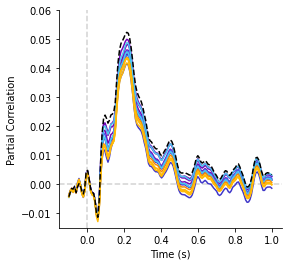

In [51]:
plot_average_partial_correlations(model_list,
                          "action_eeg_rdm", 
                          filtered_and_renamed_results_2,
                          os.path.join(dirname, 'Panel_C_average_Affordance_all_models.svg'),
                          base_corr_results="action_eeg_rdm",
                          colors=colors,
                          names=names)


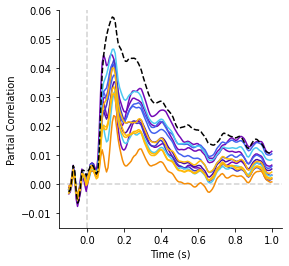

In [52]:
plot_average_partial_correlations(model_list,
                          "GIST_265", 
                          filtered_and_renamed_results_2,
                          os.path.join(dirname, 'Panel_C_average_GIST_all_models.svg'), 
                          base_corr_results="GIST_265",
                          colors=colors,
                          names=names)

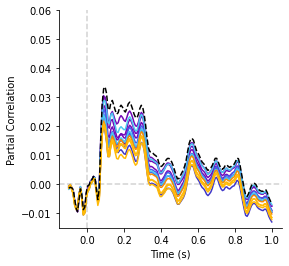

In [53]:
plot_average_partial_correlations(model_list,
                          "object_eeg_rdm", 
                          filtered_and_renamed_results_2,
                          os.path.join(dirname, 'Panel_C_average_Object_all_models.svg'),  
                          base_corr_results="object_eeg_rdm",
                          colors=colors,
                          names=names)

In [52]:
mean_action, sem_action, action_array = compute_corrs_average(distance_metric, action_eeg_rdm)
mean_object, object_action, object_array = compute_corrs_average(distance_metric, object_eeg_rdm)
mean_gist, gist_action, gist_array = compute_corrs_average(distance_metric, GIST_265)

# Example dictionary with precomputed base correlations
base_corr_data = {
    'object_eeg_rdm': {'mean_corr': mean_object},
    'action_eeg_rdm': {'mean_corr': mean_action},
    'GIST_265': {'mean_corr': mean_gist}
}

In [54]:
# Initialize the dictionary to store the averaged results
average_mean_corr_results = {}

# Iterate through each model in the filtered_and_renamed_results dictionary
for model, rdm_spaces in filtered_and_renamed_results.items():
    average_mean_corr_results[model] = {}

    # Iterate through each RDM space for the model
    for rdm_space, layers in rdm_spaces.items():
        # Collect the mean correlations for layers 1 to 4
        layer_corrs = []

        for layer_name in ['layer1', 'layer2', 'layer3', 'layer4']:
            # Check if the layer exists in the data
            if layer_name in layers and 'mean_partial_corr' in layers[layer_name]:
                # Extract the mean partial correlation for the layer
                mean_corr = layers[layer_name]['mean_partial_corr']
                
                # Ensure mean_corr is a numeric value, e.g., a float or an array that can be averaged
                layer_corrs.append(mean_corr)

        # Calculate the average mean correlation across layers for this RDM space
        if layer_corrs:  # Ensure we have data to average
            average_mean_corr = sum(layer_corrs) / len(layer_corrs)
            average_mean_corr_results[model][rdm_space] = average_mean_corr



In [55]:

def compute_auc_differences(models, rdm_space_list, filtered_and_renamed_results, base_corr_data):
    """
    Computes the AUC for the difference between the average mean correlation across layers and base correlations.
    
    Parameters:
        models (list): List of model names to process.
        rdm_space_list (list): List of RDM spaces to use (e.g., ['object_eeg_rdm', 'action_eeg_rdm', 'GIST_265']).
        filtered_and_renamed_results (dict): Dictionary with partial correlation results.
        base_corr_data (dict): Dictionary with base correlation arrays for each RDM space.
        
    Returns:
        auc_results (dict): Dictionary with AUC values for each model and RDM space.
    """
    auc_results = {}  # Dictionary to store AUC values for each model and RDM space

    for model in models:
        auc_results[model] = {}
        
        for rdm_space in rdm_space_list:
            # Check if the model and RDM space exist in the filtered_and_renamed_results and base_corr_data
            if model in filtered_and_renamed_results and rdm_space in filtered_and_renamed_results[model] and rdm_space in base_corr_data:
                
                # Collect the mean correlations for layers 1 to 4
                layer_corrs = []
                for layer_name in ['layer1', 'layer2', 'layer3', 'layer4']:
                    # Check if the layer exists and contains 'mean_partial_corr'
                    if layer_name in filtered_and_renamed_results[model][rdm_space] and 'mean_partial_corr' in filtered_and_renamed_results[model][rdm_space][layer_name]:
                        mean_corr = filtered_and_renamed_results[model][rdm_space][layer_name]['mean_partial_corr']
                        layer_corrs.append(mean_corr)
                
                # Calculate the average mean correlation across layers if available
                if layer_corrs:
                    average_layer_corr = np.mean(layer_corrs, axis=0)  # Averaging across layers for each time point
                
                    # Retrieve the base correlation mean array for the RDM space
                    mean_base_corr = base_corr_data[rdm_space]['mean_corr']
                    
                    # Calculate the difference between the averaged layer correlation and the base correlation
                    difference_curve = np.array(mean_base_corr) - np.array(average_layer_corr)

                    # Compute the AUC for the difference curve using the trapezoidal rule
                    auc = np.trapz(difference_curve)

                    # Store the AUC result for this model and RDM space
                    auc_results[model][rdm_space] = auc

    return auc_results

-5.805356526758782
5.50914075342014e-06
-4.359523823177065
0.00021171812711803716
[8.19709495e-02 3.17577191e-04 1.65274223e-05]


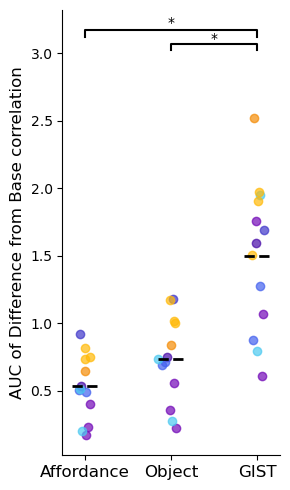

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Example colors and names matching the models
colors = [
    '#7209b7', '#7209b7', '#7209b7', "#480ca8", '#3f37c9', 
    '#4361ee', '#4361ee', '#4cc9f0', '#4cc9f0', '#f48c06', 
    '#ffba08', '#ffba08', '#ffba08'
]

names = ["AlexNet", "VGG16", "ResNet50",
         "Places365", "SceneParsing",
         "Dino", "CLIP RN101", "x3d", "slowfast RN101",
         "ViT", "DINO ViT", "CLIP ViT-B-16", "CLIP ViT-B-32"]

# Extract data for action_eeg_rdm, object_eeg_rdm, and GIST_265
action_eeg_rdm_values = [v['action_eeg_rdm'] for v in auc_results.values()]
object_eeg_rdm_values = [v['object_eeg_rdm'] for v in auc_results.values()]
gist_values = [v['GIST_265'] for v in auc_results.values()]

# Compute mean values for each RDM space for plot reference
mean_action_eeg = np.mean(action_eeg_rdm_values)
mean_object_eeg = np.mean(object_eeg_rdm_values)
mean_gist = np.mean(gist_values)

# Perform t-tests to check significance
t_stat_action_vs_object, p_val_action_vs_object = ttest_ind(action_eeg_rdm_values, object_eeg_rdm_values)
t_stat_action_vs_gist, p_val_action_vs_gist = ttest_ind(action_eeg_rdm_values, gist_values)
t_stat_object_vs_gist, p_val_object_vs_gist = ttest_ind(object_eeg_rdm_values, gist_values)
print(t_stat_action_vs_gist)
print(p_val_action_vs_gist)

print(t_stat_object_vs_gist)
print(p_val_object_vs_gist)
a, corrected_p_vals, b, c = multipletests([p_val_action_vs_object, p_val_object_vs_gist, p_val_action_vs_gist], method='fdr_bh')
print(corrected_p_vals)


# Plotting
fig, ax = plt.subplots(figsize=(3, 5))

# Scatter points for each model's AUC differences with specific colors
x_positions_action = np.ones(len(action_eeg_rdm_values)) * 1  # Action EEG
x_positions_object = np.ones(len(object_eeg_rdm_values)) * 2  # Object EEG
x_positions_gist = np.ones(len(gist_values)) * 3  # GIST

for i in range(len(action_eeg_rdm_values)):
    ax.scatter(x_positions_action[i] + np.random.normal(0, 0.05), action_eeg_rdm_values[i], color=colors[i], alpha=0.7, label=names[i] if i == 0 else "")
    ax.scatter(x_positions_object[i] + np.random.normal(0, 0.05), object_eeg_rdm_values[i], color=colors[i], alpha=0.7)
    ax.scatter(x_positions_gist[i] + np.random.normal(0, 0.05), gist_values[i], color=colors[i], alpha=0.7)

# Plot horizontal lines for mean AUC values
ax.hlines(mean_action_eeg, 0.85, 1.15, colors='black', linestyles='dashed', linewidth=2)
ax.hlines(mean_object_eeg, 1.85, 2.15, colors='black', linestyles='dashed', linewidth=2)
ax.hlines(mean_gist, 2.85, 3.15, colors='black', linestyles='dashed', linewidth=2)

# Customize plot
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Affordance', 'Object', 'GIST'], fontsize = 12)
ax.set_ylabel('AUC of Difference from Base correlation', fontsize = 12)

# Add significance bars if t-tests are significant after FDR correction
y_max = max([max(action_eeg_rdm_values), max(object_eeg_rdm_values), max(gist_values)]) + 0.5
if corrected_p_vals[0] < 0.05:
    ax.plot([1, 1, 2, 2], [y_max, y_max + 0.05, y_max + 0.05, y_max], color='black', lw=1.5)
    ax.text(1.5, y_max + 0.05, '*', ha='center', va='bottom', color='black')
if corrected_p_vals[1] < 0.05:
    ax.plot([1, 1, 3, 3], [y_max + 0.1, y_max + 0.15, y_max + 0.15, y_max + 0.1], color='black', lw=1.5)
    ax.text(2, y_max + 0.15, '*', ha='center', va='bottom', color='black')
if corrected_p_vals[2] < 0.05:
    ax.plot([2, 2, 3, 3], [y_max, y_max + 0.05, y_max + 0.05, y_max], color='black', lw=1.5)
    ax.text(2.5, y_max + 0.03, '*', ha='center', va='bottom', color='black')

# Clean up plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
#plt.savefig("/home/clemens-uva/Github_repos/EEG/EEG_final/Figures/Paper_Figures/Figure4/AUC_affordance_object_gist_colored.svg", transparent=True, dpi=300)
plt.show()
